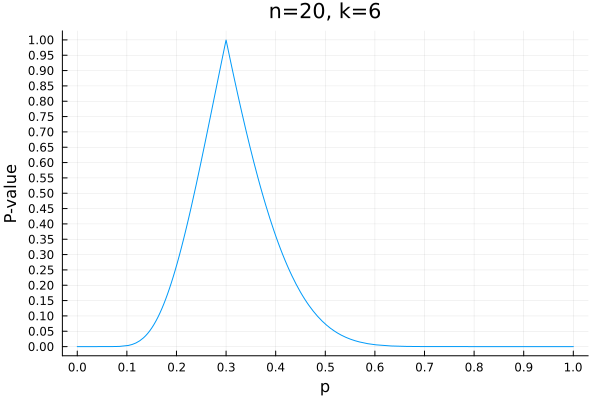

In [1]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2(1 - cdf(Normal(0, s), abs(k - n*p)))
end

plot(p -> pvalue_wilson(6, 20, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="n=20, k=6")

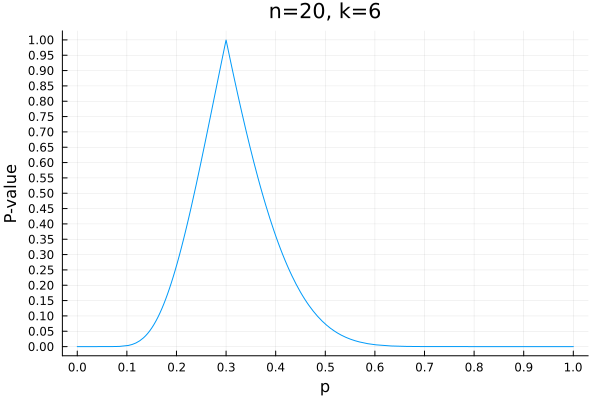

In [2]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2ccdf(Normal(0, s), abs(k - n*p))
end

plot(p -> pvalue_wilson(6, 20, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="n=20, k=6")

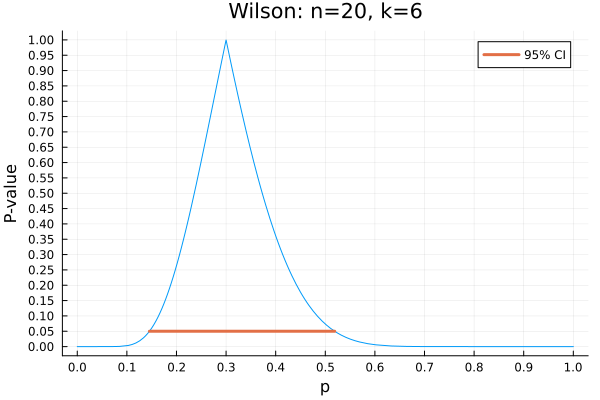

In [3]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    s = √(n*p*(1-p))
    2ccdf(Normal(0, s), abs(k - n*p))
end

function confint_wilson(k, n; α = 0.05)
    p̂ = k/n
    z = cquantile(Normal(), α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wilson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wilson: n=$n, k=$k")
plot!(confint_wilson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

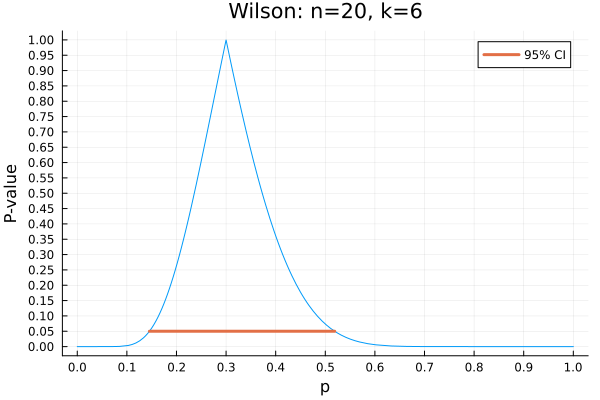

In [4]:
using Distributions
using StatsPlots

function pvalue_wilson(k, n, p)
    0 ≤ p ≤ 1 || return zero(p)
    ((k == 0 && p == 0) || (k == n && p == 1)) && return one(p)
    s = √(n*p*(1-p))
    z = (k - n*p)/s
    2ccdf(Normal(), abs(z))
end

function confint_wilson(k, n; α = 0.05)
    p̂ = k/n
    z = cquantile(Normal(), α/2)
    a, b, c = 1+z^2/n, p̂+z^2/(2n), p̂^2
    # ap² - 2bp + c = 0 を解く.
    sqrtD = √(b^2 - a*c)
    p_L = (b - sqrtD)/a
    p_U = (b + sqrtD)/a
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wilson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wilson: n=$n, k=$k")
plot!(confint_wilson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

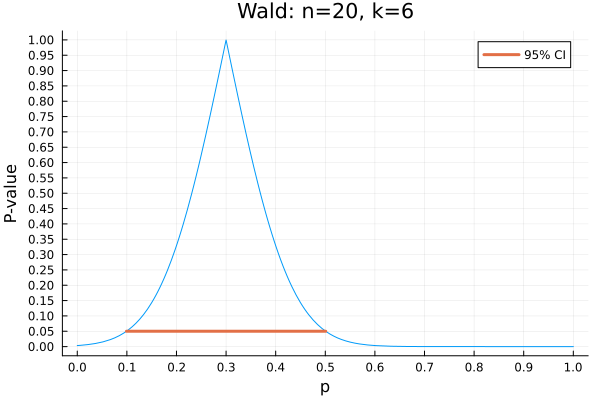

In [5]:
using Distributions
using StatsPlots

function pvalue_wald(k, n, p)
    p̂ = k/n
    ŝ = √(n*p̂*(1-p̂))
    2ccdf(Normal(0, ŝ), abs(k - n*p))
end

function confint_wald(k, n; α = 0.05)
    p̂ = k/n
    sehat = √(p̂*(1-p̂)/n)
    z = cquantile(Normal(), α/2)
    [p̂ - z*sehat, p̂ + z*sehat]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_wald(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Wald: n=$n, k=$k")
plot!(confint_wald(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

* Alan Agresti and Brent A. Coull,<br>
  Approximate is Better than “Exact” for Interval Estimation of Binomial Proportions,<br>
  The American Statistician, Vol. 52, No. 2 (May, 1998), pp. 119-126 (8 pages)<br>
  https://www.jstor.org/stable/2685469<br>
  https://users.stat.ufl.edu/~aa/articles/agresti_coull_1998.pdf

に書いてあることの解説

試行回数 $n$, 成功回数 $k$ というデータに対応する信頼度 $1-\alpha$ のWilsonのスコア信頼区間の両端の点は,

$$
\hat{p} = k/n, \quad
z = \mathrm{quantile}(\mathrm{Normal}(), 1-\alpha/2), \quad
a = 1+z^2/n, \quad
b = \hat{p} + z^2/(2n), \quad
c = \hat{p}^2
$$

とおいたとき,

$$
p_{\pm} = \frac{b \pm \sqrt{b^2 - ac}}{a}
$$

と表される.  これは二次方程式 $ap^2 - 2bp + c = 0$ の2つの解である.

ゆえに, Wilsonのスコア信頼区間の中点は次のように, 形式的に試行回数 $n+z^2$, 成功回数 $k+z^2/2$ というデータから得られる二項分布モデルの成功確率パラメータの最尤推定量の形に書き直される:

$$
\frac{p_+ + p_-}{2} = \frac{b}{a}
= \frac{\hat{p} + z^2/(2n)}{1+z^2/n}
= \frac{k + z^2/2}{n+z^2}
$$

これは次のように $\hat{p}$ と $1/2$ の荷重平均の形にも書き直される:

$$
\frac{p_+ + p_-}{2}
= \frac{n}{n+z^2}\hat{p} + \frac{z^2}{n+z^2}\frac{1}{2}.
$$

さらに

$$
b^2 - ac = \frac{z^2\hat{p}(1-\hat{p})}{n} + \frac{z^4}{4n^2}
= z^2\left(\frac{\hat{p}(1-\hat{p})}{n} + \frac{z^2}{n}\frac{(1/2)(1/2)}{n}\right)
$$

なので, その中点から区間の両端の点への距離は

$$
\frac{p_+ - p_-}{2} = \frac{\sqrt{b^2 - ac}}{a}
= z\sqrt{\frac{n}{n+z^2}\frac{\hat{p}(1-\hat{p})}{n+z^2} + \frac{z^2}{n+z^2}\frac{(1/2)(1/2)}{n+z^2}}.
$$

に等しい. 右辺の平方根の内側は形式的に試行回数が $n+z^2$ の場合の成功確率 $\hat{p}$ と $1/2$ の二項分布達の分散の荷重平均の形になっている.

この等式から, Wilsonのスコア信頼区間の中点から両端への距離は, $n$ が大きなとき次のように近似されることもわかる:

$$
\frac{p_+ - p_-}{2} = \frac{\sqrt{b^2 - ac}}{a}
= z\sqrt{\frac{\hat{p}(1-\hat{p})}{n+z^2}}.
$$

この近似式の平方根の内側は形式的に試行回数が $n$ が $n+z^2$ で成功確率が $\hat{p}$ の二項分布の分散の形になっている.

以上をまとめると, Wilsonのスコア信頼区間の両端の点は、試行回数 $n+z^2$, 成功回数 $k+z^2/2$ の場合のWaldの信頼区間で近似されることがわかる.

特に $\alpha=0.05$ のとき $z\approx 2$ なので, 試行回数 $n$, 成功回数 $k$ というデータに対応するWilsonの95%信頼区間は試行回数 $n+4$, 成功回数 $k+2$ というデータに対応するWaldの信頼区間で近似される.

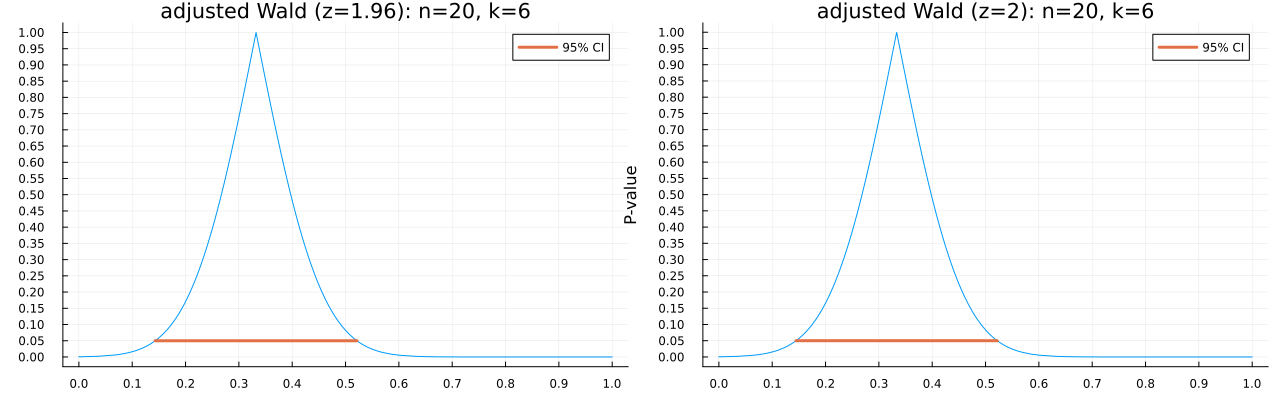

In [6]:
# https://users.stat.ufl.edu/~aa/articles/agresti_coull_1998.pdf

using Distributions
using StatsPlots

function pvalue_adjusted_wald(k, n, p; α=0.05, z=cquantile(Normal(), α/2))
    pvalue_wald(k+z^2/2, n+z^2, p)
end

function confint_adjusted_wald(k, n; α = 0.05, z=cquantile(Normal(), α/2))
    confint_wald(k+z^2/2, n+z^2; α)
end

function pvalue_adjusted_wald2(k, n, p)
    pvalue_adjusted_wald(k, n, p; z=2)
end

function confint_adjusted_wald2(k, n)
    confint_adjusted_wald(k, n; α=0.05, z=2)
end

k, n, α = 6, 20, 0.05

P1 = plot(p -> pvalue_adjusted_wald(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="adjusted Wald (z=$(round(cquantile(Normal(), α/2); digits=2))): n=$n, k=$k")
plot!(confint_adjusted_wald(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

P2 = plot(p -> pvalue_adjusted_wald2(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="adjusted Wald (z=2): n=$n, k=$k")
plot!(confint_adjusted_wald2(k, n), fill(α, 2);
    label="95% CI", lw=3)

plot(P1, P2; size=(1280, 400))

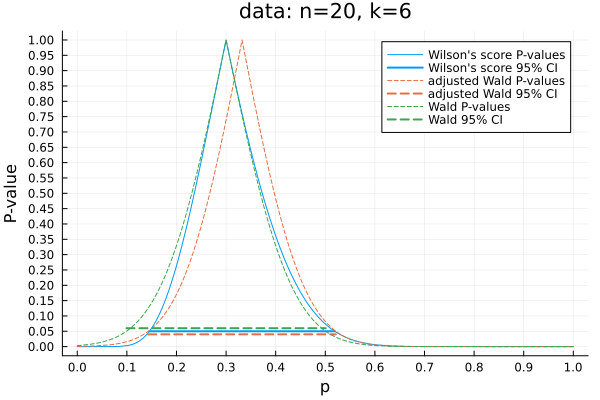

In [7]:
k, n, α = 6, 20, 0.05
pmin, pmax = 0, 1

plot()

plot!(p -> pvalue_wilson(k, n, p), pmin, pmax; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson's score P-values")
plot!(confint_wilson(k, n; α), fill(1.0α, 2); c=1,
    label="Wilson's score 95% CI", lw=2)

plot!(p -> pvalue_adjusted_wald(k, n, p), pmin, pmax; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald P-values")
plot!(confint_adjusted_wald(k, n; α), fill(0.8α, 2); c=2, ls=:dash,
    label="adjusted Wald 95% CI", lw=2)

plot!(p -> pvalue_wald(k, n, p), pmin, pmax; c=3, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wald P-values")
plot!(confint_wald(k, n; α), fill(1.2α, 2); c=3, ls=:dash,
    label="Wald 95% CI", lw=2)

title!("data: n=$n, k=$k")

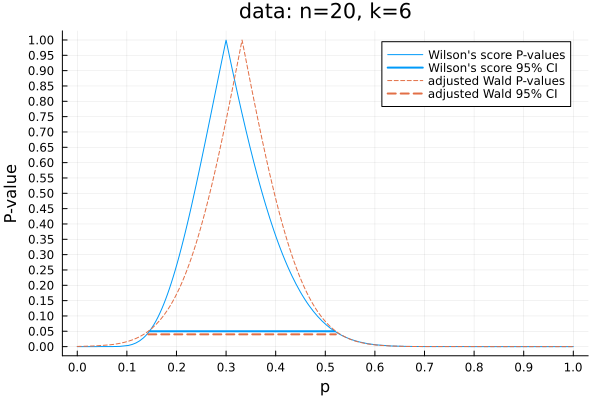

In [8]:
k, n, α = 6, 20, 0.05
pmin, pmax = 0, 1

plot()

plot!(p -> pvalue_wilson(k, n, p), pmin, pmax; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson's score P-values")
plot!(confint_wilson(k, n; α), fill(1.0α, 2); c=1,
    label="Wilson's score 95% CI", lw=2)

plot!(p -> pvalue_adjusted_wald(k, n, p), pmin, pmax; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald P-values")
plot!(confint_adjusted_wald(k, n; α), fill(0.8α, 2); c=2, ls=:dash,
    label="adjusted Wald 95% CI", lw=2)

# plot!(p -> pvalue_wald(k, n, p), pmin, pmax; c=3, ls=:dash,
#     xguide="p", yguide="P-value",
#     xtick=0:0.1:1, ytick=0:0.05:1,
#     label="Wald P-values")
# plot!(confint_wald(k, n; α), fill(1.2α, 2); c=3, ls=:dash,
#     label="Wald 95% CI", lw=2)

title!("data: n=$n, k=$k")

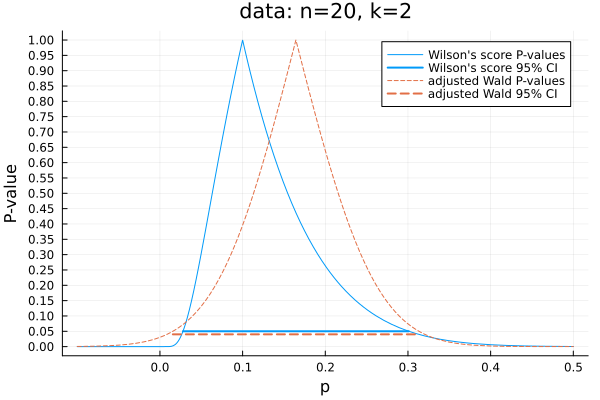

In [9]:
k, n, α = 2, 20, 0.05
pmin, pmax = -0.1, 0.5

plot()

plot!(p -> pvalue_wilson(k, n, p), pmin, pmax; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson's score P-values")
plot!(confint_wilson(k, n; α), fill(1.0α, 2); c=1,
    label="Wilson's score 95% CI", lw=2)

plot!(p -> pvalue_adjusted_wald(k, n, p), pmin, pmax; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald P-values")
plot!(confint_adjusted_wald(k, n; α), fill(0.8α, 2); c=2, ls=:dash,
    label="adjusted Wald 95% CI", lw=2)

# plot!(p -> pvalue_wald(k, n, p), pmin, pmax; c=3, ls=:dash,
#     xguide="p", yguide="P-value",
#     xtick=0:0.1:1, ytick=0:0.05:1,
#     label="Wald P-values")
# plot!(confint_wald(k, n; α), fill(1.2α, 2); c=3, ls=:dash,
#     label="Wald 95% CI", lw=2)

title!("data: n=$n, k=$k")

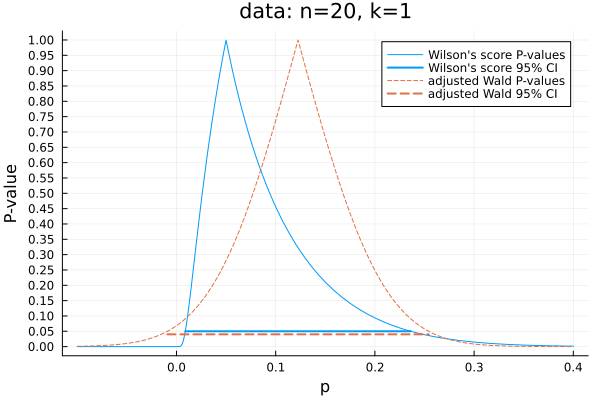

In [10]:
k, n, α = 1, 20, 0.05
pmin, pmax = -0.1, 0.4

plot()

plot!(p -> pvalue_wilson(k, n, p), pmin, pmax; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson's score P-values")
plot!(confint_wilson(k, n; α), fill(1.0α, 2); c=1,
    label="Wilson's score 95% CI", lw=2)

plot!(p -> pvalue_adjusted_wald(k, n, p), pmin, pmax; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald P-values")
plot!(confint_adjusted_wald(k, n; α), fill(0.8α, 2); c=2, ls=:dash,
    label="adjusted Wald 95% CI", lw=2)

# plot!(p -> pvalue_wald(k, n, p), pmin, pmax; c=3, ls=:dash,
#     xguide="p", yguide="P-value",
#     xtick=0:0.1:1, ytick=0:0.05:1,
#     label="Wald P-values")
# plot!(confint_wald(k, n; α), fill(1.2α, 2); c=3, ls=:dash,
#     label="Wald 95% CI", lw=2)

title!("data: n=$n, k=$k")

confint_wilson(k, n; α) = [0.21894885294932742, 0.39584854633346683]
confint_adjusted_wald(k, n; α) = [0.21865135554501797, 0.39614604373777634]
confint_wald(k, n; α) = [0.21018316681457921, 0.38981683318542076]


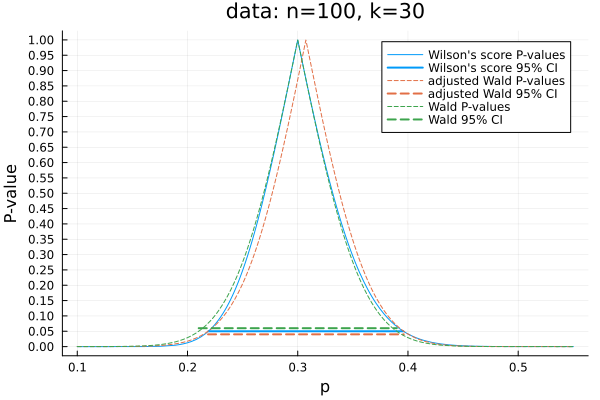

In [11]:
k, n, α = 30, 100, 0.05
pmin, pmax = 0.1, 0.55

plot()

plot!(p -> pvalue_wilson(k, n, p), pmin, pmax; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson's score P-values")
plot!(@show(confint_wilson(k, n; α)), fill(1.0α, 2); c=1,
    label="Wilson's score 95% CI", lw=2)

plot!(p -> pvalue_adjusted_wald(k, n, p), pmin, pmax; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald P-values")
plot!(@show(confint_adjusted_wald(k, n; α)), fill(0.8α, 2); c=2, ls=:dash,
    label="adjusted Wald 95% CI", lw=2)

plot!(p -> pvalue_wald(k, n, p), pmin, pmax; c=3, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wald P-values")
plot!(@show(confint_wald(k, n; α)), fill(1.2α, 2); c=3, ls=:dash,
    label="Wald 95% CI", lw=2)

title!("data: n=$n, k=$k")

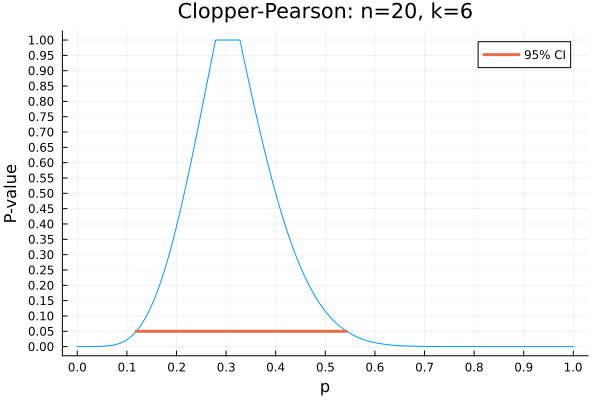

In [12]:
using Distributions
using StatsPlots

function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    pvalue_clopper_pearson(bin, k)
end

function confint_clopper_pearson(k, n; α = 0.05)
    p_L = k > 0 ?  quantile(Beta(k, n-k+1), α/2) : zero(α)
    p_U = k < n ? cquantile(Beta(k+1, n-k), α/2) : one(α)
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Clopper-Pearson: n=$n, k=$k")
plot!(confint_clopper_pearson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

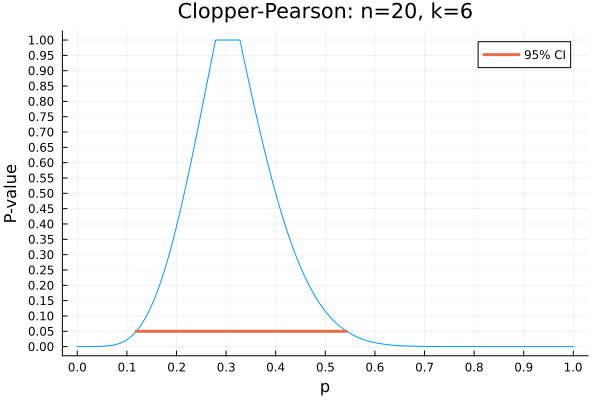

In [13]:
using Distributions
using Roots
using StatsPlots

function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    pvalue_clopper_pearson(bin, k)
end

function confint_generic(pvaluefunc, pmin, pmax, α)
    find_zeros(p -> pvaluefunc(p) - α, pmin, pmax)
end

function confint_clopper_pearson(k, n; α = 0.05)
    pvaluefunc(p) = pvalue_clopper_pearson(k, n, p)
    confint_generic(pvaluefunc, 0, 1, α)
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Clopper-Pearson: n=$n, k=$k")
plot!(confint_clopper_pearson(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

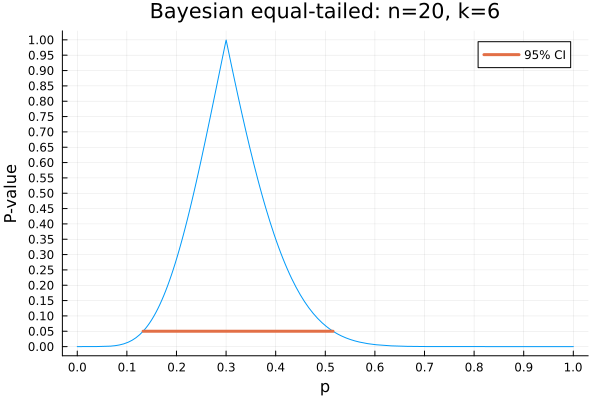

In [14]:
using Distributions
using StatsPlots

function pvalue_bayes_eti(k, n, p; a=1/3, b=1/3)
    beta = Beta(a+k, b+n-k)
    min(1, 2cdf(beta, p), 2ccdf(beta, p))
end

function confint_bayes_eti(k, n; α = 0.05, a=1/3, b=1/3)
    beta = Beta(a+k, b+n-k)
    p_L =  quantile(beta, α/2)
    p_U = cquantile(beta, α/2)
    [p_L, p_U]
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_bayes_eti(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Bayesian equal-tailed: n=$n, k=$k")
plot!(confint_bayes_eti(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

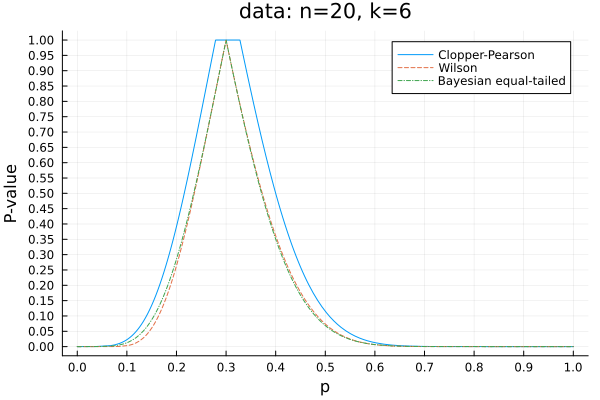

In [15]:
k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Clopper-Pearson")

plot!(p -> pvalue_wilson(k, n, p), 0, 1; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson")

plot!(p -> pvalue_bayes_eti(k, n, p), 0, 1; c=3, ls=:dashdot,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Bayesian equal-tailed")

title!("data: n=$n, k=$k")

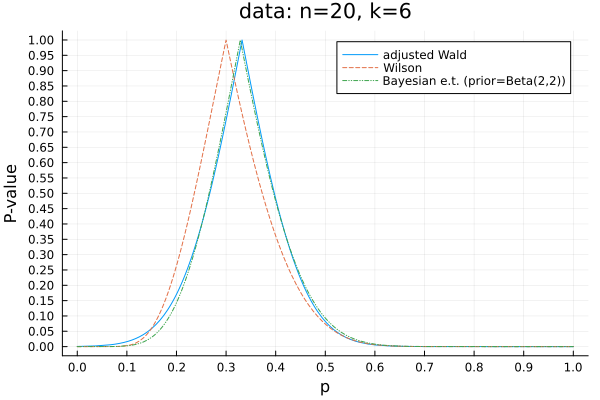

In [16]:
k, n, α = 6, 20, 0.05

plot(p -> pvalue_adjusted_wald(k, n, p), 0, 1; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald")

plot!(p -> pvalue_wilson(k, n, p), 0, 1; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson")

plot!(p -> pvalue_bayes_eti(k, n, p; a=2, b=2), 0, 1; c=3, ls=:dashdotdot,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Bayesian e.t. (prior=Beta(2,2))")

title!("data: n=$n, k=$k")

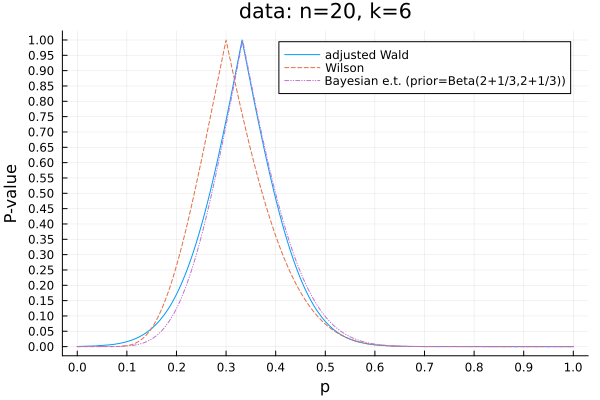

In [17]:
k, n, α = 6, 20, 0.05

plot(p -> pvalue_adjusted_wald(k, n, p), 0, 1; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="adjusted Wald")

plot!(p -> pvalue_wilson(k, n, p), 0, 1; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson")

plot!(p -> pvalue_bayes_eti(k, n, p; a=2+1/3, b=2+1/3), 0, 1; c=4, ls=:dashdotdot,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Bayesian e.t. (prior=Beta(2+1/3,2+1/3))")

title!("data: n=$n, k=$k")

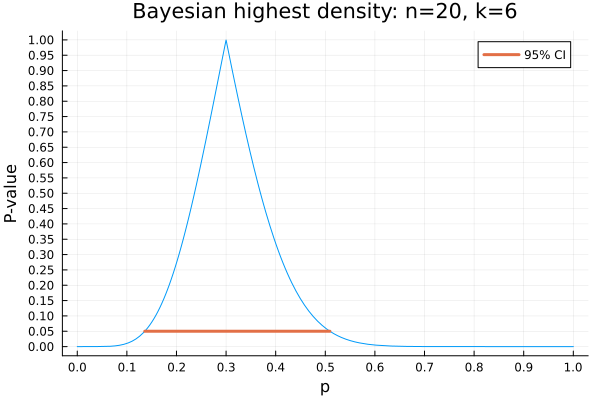

In [18]:
using Distributions
using Optim
using StatsPlots

function hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
    f(t) = quantile(dist, t + (1 - α)) - quantile(dist, t)
    o = optimize(f, 0, α, alg)
    p = o.minimizer
    quantile.(dist, [p, p + (1 - α)])
end

function pvalue_hdi(dist::ContinuousUnivariateDistribution, x₀; xlim = extrema(dist))
    p₀ = pdf(dist, x₀)
    m = mode(dist)
    f(x) = pdf(dist, x) - p₀
    if x₀ == m
        1.0
    elseif x₀ > m
        x₁ = find_zero(f, (xlim[begin], m))
        cdf(dist, x₁) + ccdf(dist, x₀)
    else
        x₁ = find_zero(f, (m, xlim[end]))
        cdf(dist, x₀) + ccdf(dist, x₁)
    end
end

function pvalue_bayes_hdi(k, n, p; a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    if k+a ≤ 1
        return ccdf(posterior, p)
    elseif n-k+b ≤ 1
        return cdf(posterior, p)
    end
    pvalue_hdi(posterior, p)
end

function confint_bayes_hdi(k, n; α=0.05, a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    hdi(posterior, α)
end

k, n, α = 6, 20, 0.05

plot(p -> pvalue_bayes_hdi(k, n, p), 0, 1;
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="", title="Bayesian highest density: n=$n, k=$k")
plot!(confint_bayes_hdi(k, n; α), fill(α, 2);
    label="95% CI", lw=3)

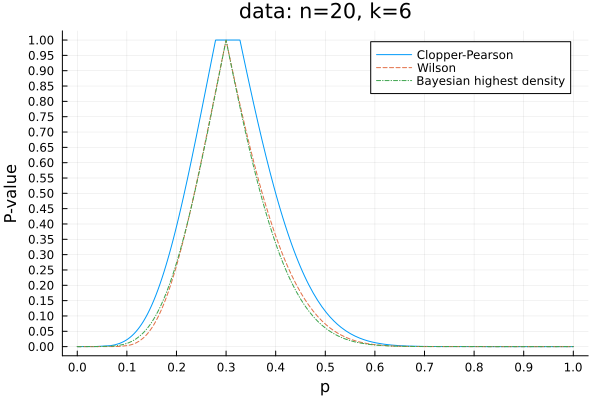

In [19]:
k, n, α = 6, 20, 0.05

plot(p -> pvalue_clopper_pearson(k, n, p), 0, 1; c=1,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Clopper-Pearson")

plot!(p -> pvalue_wilson(k, n, p), 0, 1; c=2, ls=:dash,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Wilson")

plot!(p -> pvalue_bayes_hdi(k, n, p), 0, 1; c=3, ls=:dashdot,
    xguide="p", yguide="P-value",
    xtick=0:0.1:1, ytick=0:0.05:1,
    label="Bayesian highest density")

title!("data: n=$n, k=$k")